In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [3]:
!kaggle datasets download -d manjeetsingh/retaildataset

  0% 0.00/3.11M [00:00<?, ?B/s]
100% 3.11M/3.11M [00:00<00:00, 51.5MB/s]


In [4]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  retaildataset.zip
replace Features data set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sales data-set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace stores data-set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
import numpy as np
import pandas as pd
import scipy

In [6]:
feat = pd.read_csv('Features data set.csv')
feat.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [7]:
sales = pd.read_csv('sales data-set.csv')
store = pd.read_csv('stores data-set.csv')

In [8]:
sales.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [9]:
print(f'store shape {store.shape}')
print(f'sales shape {sales.shape}')

store shape (45, 3)
sales shape (421570, 5)


In [10]:
store.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [11]:
#Let's join all the datasets together to make it make sense

sub_df = pd.merge(sales, store, on = 'Store', how = 'left')
sub_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315


In [12]:
feat.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [13]:
# Now, merge with the features dataset

df = pd.merge(sub_df, feat, on = ['Store','Date'], how = 'left')
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [14]:
df.shape

(421570, 17)

In [15]:
# Okay, so we've joined our files together. Let's look at the entire dataset now.

In [16]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [17]:
# So in our dataset, the only dirty features are the Markdown columns

In [18]:
df['Weekly_Sales'].value_counts()

10.00       353
5.00        289
20.00       232
15.00       215
12.00       175
           ... 
6835.41       1
10467.96      1
31889.20      1
6748.45       1
14543.76      1
Name: Weekly_Sales, Length: 359464, dtype: int64

In [19]:
#Based on this tast, our goal is regression and to find out the number of Weekly Sales

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [21]:
#First, let's handle the date feature
import datetime as dt
df.Date = pd.to_datetime(df.Date, format = '%d/%m/%Y')

date_col = ['Date']
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
        df[feat +'_year'] = df[feat].dt.year
    df.drop(columns=date_col,axis=1,inplace=True)

In [22]:
extract_date_info(df, date_col,)

In [23]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Date_day,Date_month,Date_quarter,Date_year
0,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,1,2010
1,1,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,12,2,1,2010
2,1,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,19,2,1,2010
3,1,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,26,2,1,2010
4,1,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,5,3,1,2010


In [24]:
comparison = np.where(df['IsHoliday_x'] == df['IsHoliday_y'], True, False)

In [25]:
comparison

array([ True,  True,  True, ...,  True,  True,  True])

In [26]:
del df['IsHoliday_x']

In [27]:
df.head(2)

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Date_day,Date_month,Date_quarter,Date_year
0,1,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,1,2010
1,1,1,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,12,2,1,2010


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


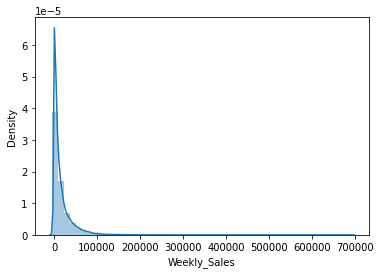

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Weekly_Sales']);

In [29]:
df['Weekly_Sales'].value_counts()

10.00       353
5.00        289
20.00       232
15.00       215
12.00       175
           ... 
6835.41       1
10467.96      1
31889.20      1
6748.45       1
14543.76      1
Name: Weekly_Sales, Length: 359464, dtype: int64

In [30]:
#As we can see, our target variable is highly skewed.

In [31]:
df.head()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Date_day,Date_month,Date_quarter,Date_year
0,1,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,1,2010
1,1,1,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,12,2,1,2010
2,1,1,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,19,2,1,2010
3,1,1,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,26,2,1,2010
4,1,1,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,5,3,1,2010


In [35]:
df['Weekly_Sales'] < 0

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: Weekly_Sales, Length: 421570, dtype: bool

In [43]:
df['Credit_or_Debit'] = np.where(df['Weekly_Sales'] < 0, 'Credit', 'Debit')

In [45]:
df['Weekly_Sales'] = abs(df['Weekly_Sales'])

#We can adjust this by transform it using a log transformation
df['Weekly_Sales_log'] = np.log1p(df['Weekly_Sales'])
df.drop('Weekly_Sales',axis = 1, inplace = True)

In [46]:
df.head()

,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Date_day,Date_month,Date_quarter,Date_year,Credit_or_Debit,Weekly_Sales_log
0,1,1,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2,1,2010,Debit,10.123647
1,1,1,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,12,2,1,2010,Debit,10.737277
2,1,1,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,19,2,1,2010,Debit,10.635773
3,1,1,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,26,2,1,2010,Debit,9.873262
4,1,1,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,5,3,1,2010,Debit,9.990990


In [48]:
features = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5' ]
0 in features

False

In [56]:
df.isnull().sum()

Store                    0
Dept                     0
Type                     0
Size                     0
Temperature              0
Fuel_Price               0
MarkDown1           270889
MarkDown2           310322
MarkDown3           284479
MarkDown4           286603
MarkDown5           270138
CPI                      0
Unemployment             0
IsHoliday_y              0
Date_day                 0
Date_month               0
Date_quarter             0
Date_year                0
Credit_or_Debit          0
Weekly_Sales_log         0
dtype: int64

In [57]:
df.fillna(0, inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Store             421570 non-null  int64  
 1   Dept              421570 non-null  int64  
 2   Type              421570 non-null  object 
 3   Size              421570 non-null  int64  
 4   Temperature       421570 non-null  float64
 5   Fuel_Price        421570 non-null  float64
 6   MarkDown1         421570 non-null  float64
 7   MarkDown2         421570 non-null  float64
 8   MarkDown3         421570 non-null  float64
 9   MarkDown4         421570 non-null  float64
 10  MarkDown5         421570 non-null  float64
 11  CPI               421570 non-null  float64
 12  Unemployment      421570 non-null  float64
 13  IsHoliday_y       421570 non-null  bool   
 14  Date_day          421570 non-null  int64  
 15  Date_month        421570 non-null  int64  
 16  Date_quarter      42

In [62]:
df['Type'].nunique()

3

In [67]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()

feats = ['IsHoliday_y', 'Type', 'Credit_or_Debit']
df['IsHoliday_y'] = labenc.fit_transform(df['IsHoliday_y'])

In [70]:
df['Type'] = labenc.fit_transform(df['Type'])
df['Credit_or_Debit'] = labenc.fit_transform(df['Credit_or_Debit'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Store             421570 non-null  int64  
 1   Dept              421570 non-null  int64  
 2   Type              421570 non-null  int64  
 3   Size              421570 non-null  int64  
 4   Temperature       421570 non-null  float64
 5   Fuel_Price        421570 non-null  float64
 6   MarkDown1         421570 non-null  float64
 7   MarkDown2         421570 non-null  float64
 8   MarkDown3         421570 non-null  float64
 9   MarkDown4         421570 non-null  float64
 10  MarkDown5         421570 non-null  float64
 11  CPI               421570 non-null  float64
 12  Unemployment      421570 non-null  float64
 13  IsHoliday_y       421570 non-null  int64  
 14  Date_day          421570 non-null  int64  
 15  Date_month        421570 non-null  int64  
 16  Date_quarter      42

In [72]:
df.head()

,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Date_day,Date_month,Date_quarter,Date_year,Credit_or_Debit,Weekly_Sales_log
0,1,1,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,2,1,2010,1,10.123647
1,1,1,0,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,12,2,1,2010,1,10.737277
2,1,1,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,19,2,1,2010,1,10.635773
3,1,1,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,26,2,1,2010,1,9.873262
4,1,1,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,5,3,1,2010,1,9.990990


In [74]:
#Okay, the last thing to do is to split our dataset into test and train

In [75]:
df[df['Date_year'] == 2012]

,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Date_day,Date_month,Date_quarter,Date_year,Credit_or_Debit,Weekly_Sales_log
100,1,1,0,151315,49.01,3.157,6277.39,21813.16,143.10,1450.13,8483.00,219.714258,7.348,0,6,1,1,2012,1,9.715270
101,1,1,0,151315,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,7.348,0,13,1,1,2012,1,9.734797
102,1,1,0,151315,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,7.348,0,20,1,1,2012,1,9.818262
103,1,1,0,151315,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,7.348,0,27,1,1,2012,1,9.818973
104,1,1,0,151315,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,0,3,2,1,2012,1,10.065245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,1,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,0,28,9,3,2012,1,6.233175
421566,45,98,1,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,0,5,10,4,2012,1,6.444290
421567,45,98,1,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,0,12,10,4,2012,1,6.967928
421568,45,98,1,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,0,19,10,4,2012,1,6.634646


In [76]:
df.shape

(421570, 20)

In [81]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split

In [82]:
X.head()

,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Date_day,Date_month,Date_quarter,Date_year,Credit_or_Debit
0,1,1,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,2,1,2010,1
1,1,1,0,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,12,2,1,2010,1
2,1,1,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,19,2,1,2010,1
3,1,1,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,26,2,1,2010,1
4,1,1,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,5,3,1,2010,1


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [85]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor

     |████████████████████████████████| 66.3MB 61kB/s 


In [87]:
def mape(y_true, y_pred):
    ABS = np.abs(y_true - y_pred)
    return (ABS.sum()/y_true.sum()) * 100
seed = 123


model1 = ExtraTreesRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1, random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
100-mape(np.expm1(y_test), np.expm1(y_pred))

90.33769026242896

In [89]:
model2 = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1, random_state=seed)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
100-mape(np.expm1(y_test), np.expm1(y_pred))

90.94254740456432

In [90]:
model3 = CatBoostRegressor()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
100-mape(np.expm1(y_test), np.expm1(y_pred))

Learning rate set to 0.10874
0:	learn: 1.9711438	total: 131ms	remaining: 2m 11s
1:	learn: 1.9079879	total: 196ms	remaining: 1m 38s
2:	learn: 1.8535381	total: 259ms	remaining: 1m 26s
3:	learn: 1.8087599	total: 318ms	remaining: 1m 19s
4:	learn: 1.7698960	total: 380ms	remaining: 1m 15s
5:	learn: 1.7236701	total: 448ms	remaining: 1m 14s
6:	learn: 1.6958863	total: 508ms	remaining: 1m 12s
7:	learn: 1.6661384	total: 569ms	remaining: 1m 10s
8:	learn: 1.6400812	total: 637ms	remaining: 1m 10s
9:	learn: 1.6210440	total: 690ms	remaining: 1m 8s
10:	learn: 1.5900904	total: 753ms	remaining: 1m 7s
11:	learn: 1.5734008	total: 811ms	remaining: 1m 6s
12:	learn: 1.5568322	total: 869ms	remaining: 1m 5s
13:	learn: 1.5337887	total: 938ms	remaining: 1m 6s
14:	learn: 1.5223774	total: 991ms	remaining: 1m 5s
15:	learn: 1.5082446	total: 1.05s	remaining: 1m 4s
16:	learn: 1.4946921	total: 1.11s	remaining: 1m 4s
17:	learn: 1.4848267	total: 1.16s	remaining: 1m 3s
18:	learn: 1.4724846	total: 1.22s	remaining: 1m 3s
19:

80.40452711233904